# 1- Data Acquisition

We are going to use a dataset that is already collected.

In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Ici on importe les bibliothèque et on charge les données

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
twitt_data = pd.read_csv('./twitter_training.csv/twitter_training.csv')
twitt_data=twitt_data[(twitt_data["Feel"]=='Negative') | (twitt_data["Feel"]=='Positive')]
twitt_data.head()

,id,Subject,Feel,Twitt
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#2 Exploration des données
Avant de concevoir un modèle ou de prendre des décisions sur le traitement des données, il est essentiel de bien comprendre la structure et le contenu de notre dataset. C’est une étape incontournable dans tout projet de Machine Learning.


Mean description length:  103.07004196062157
Min overview length:  1
Max overview length:  727


<Axes: ylabel='Frequency'>

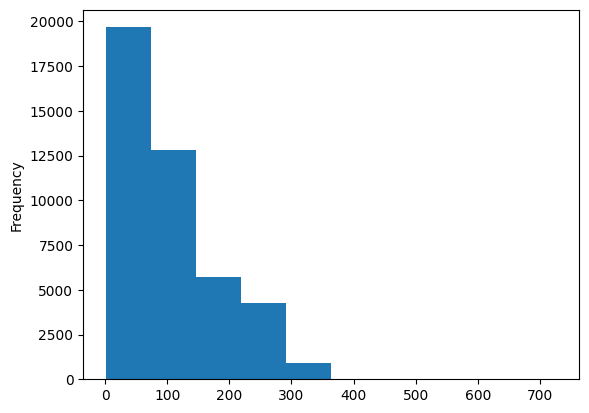

In [3]:
#Ici on mesure les tweet

twitt_data['Len']= twitt_data.Twitt.astype(str).apply(len)

print("Mean description length: ", twitt_data['Len'].mean())
print("Min overview length: ", twitt_data['Len'].min())
print("Max overview length: ", twitt_data['Len'].max())
twitt_data['Len'].plot.hist()

In [4]:
twitt_data.Feel.value_counts()
#Ici on compte combien de tweets dans chaque catégori

Feel
Negative    22542
Positive    20832
Name: count, dtype: int64

#3. Nettoyage et Prétraitement

Maintenant que nous avons une meilleure compréhension de la structure des données, nous pouvons passer à l’étape de nettoyage. Cette phase est cruciale avant d’entraîner un modèle, car elle permet de supprimer les éléments non pertinents et d’uniformiser les données textuelles.

L’idée est d’éliminer tout ce qui pourrait perturber la lecture sémantique : caractères spéciaux, ponctuation inutile, mots sans valeur informative, etc.

On définit les classes de tweet à des valeurs


In [5]:
def target(row):
  if row['Feel'] == 'Positive':
    return 1
  elif row['Feel'] == 'Negative':
    return 0
  elif row['Feel'] == 'Neutral':
    return 2
  else:
    return 3

In [6]:
#we will create a target variable which is True if the genre is action and False otherwise
twitt_data['target'] = twitt_data.apply(target,axis=1)
twitt_data.head()

,id,Subject,Feel,Twitt,Len,target
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,1


C:\Users\amzil\AppData\Local\Temp\ipykernel_24128\3629324348.py:20: UserWarning: Glyph 129473 (\N{CUPCAKE}) missing from current font.
  plt.tight_layout()
C:\Users\amzil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129473 (\N{CUPCAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


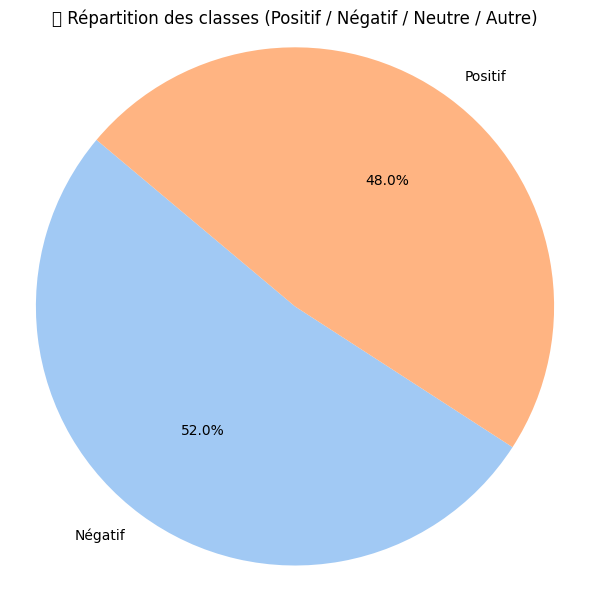

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping des classes pour affichage lisible
labels_map = {
    0: "Négatif",
    1: "Positif",
    2: "Neutre",
    3: "Autre"
}

# Comptage des classes
class_counts = twitt_data['target'].value_counts().sort_index()

# 🟨 Pie chart (camembert)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=[labels_map[i] for i in class_counts.index], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("🧁 Répartition des classes (Positif / Négatif / Neutre / Autre)")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [8]:
# Nous créons une variable cible (target) qui vaut True si le tweet correspond au genre "action", et False sinon
twitt_data['target'] = twitt_data.apply(target, axis=1)

# Affichage des premières lignes du jeu de données modifié
twitt_data.head()


,id,Subject,Feel,Twitt,Len,target
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,1


#☁️ Visualisation des mots les plus fréquents

Tweets liés à l’action

Dans cette section, nous générons un nuage de mots (word cloud) pour visualiser les termes les plus fréquents dans les tweets classés comme "action".

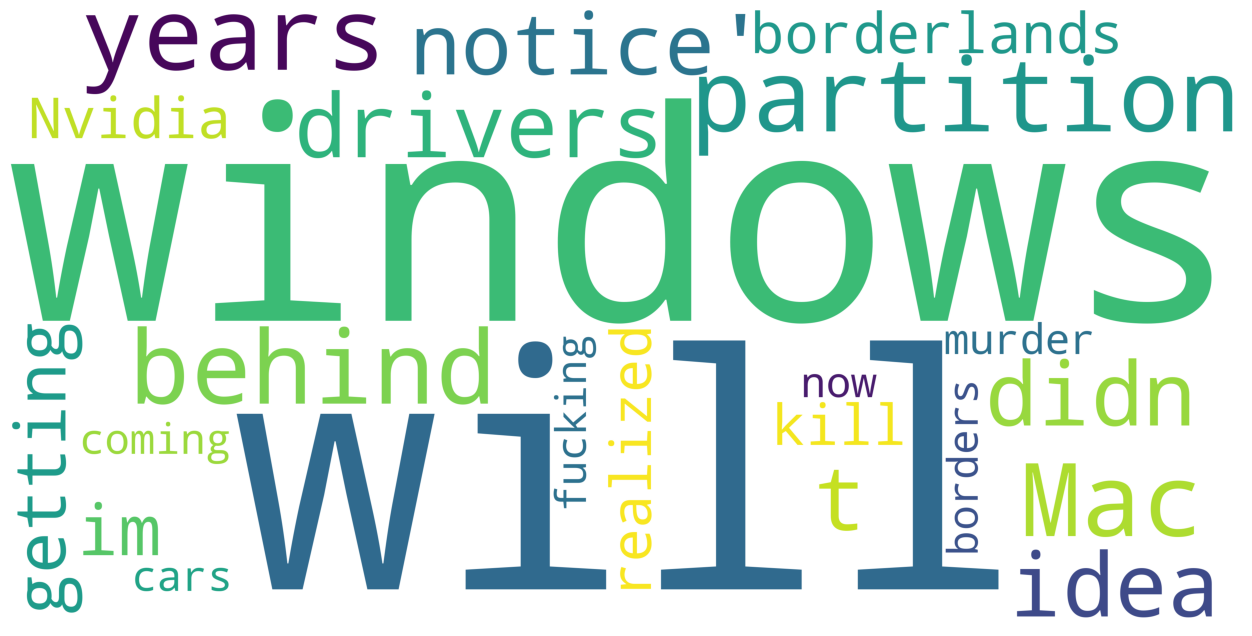

In [9]:
#we will create a word cloud to see the most common words in the descriptions if the movie is action
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
action = twitt_data[twitt_data['target'] == 1]
action_text = action['Twitt'].values
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Nous souhaitons supprimer la ponctuation, car elle introduirait des "noises" dans le classificateur.

In [10]:
import string

exclude = set(string.punctuation)
def remove_punctuation(row):
    return ''.join(ch for ch in str(row.Twitt) if ch not in exclude)
twitt_data["Twitt_without_pnctuation"]= twitt_data.apply(remove_punctuation, axis = 1)

In [11]:
twitt_data

,id,Subject,Feel,Twitt,Len,target,Twitt_without_pnctuation
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,1,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,1,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128,1,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117,1,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125,1,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159,1,Just realized between the windows partition of...


In [12]:
twitt_data.Twitt[322]

"Hey guys! @Optus appears to have had an accident just as the blood stream was getting as good! Now As an apology I's ll be back tomorrow for US MORE The borderlands! But Once again, big apologies, though no idea what exactly happened!"

Ici on va modifier les tweets en enlevant les majuscules et la ponctuation

In [13]:
#we will put all the words in lower case
twitt_data['Twitt_without_pnctuation_and_lower'] = twitt_data['Twitt_without_pnctuation'].apply(lambda x: x.lower())
print(twitt_data['Twitt_without_pnctuation'][322])
print(twitt_data['Twitt_without_pnctuation_and_lower'][322])


Hey guys Optus appears to have had an accident just as the blood stream was getting as good Now As an apology Is ll be back tomorrow for US MORE The borderlands But Once again big apologies though no idea what exactly happened
hey guys optus appears to have had an accident just as the blood stream was getting as good now as an apology is ll be back tomorrow for us more the borderlands but once again big apologies though no idea what exactly happened


In [14]:
twitt_data

,id,Subject,Feel,Twitt,Len,target,Twitt_without_pnctuation,Twitt_without_pnctuation_and_lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,1,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,1,im getting on borderlands and i will kill you all,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,1,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,1,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128,1,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117,1,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125,1,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159,1,Just realized between the windows partition of...,just realized between the windows partition of...



**Nous pouvons lemmatiser notre texte**

La lemmatisation, en linguistique, est le processus qui consiste à regrouper les différentes formes fléchies d’un mot pour qu’elles puissent être analysées comme un seul élément, identifié par son lemme, c’est-à-dire sa forme de base (comme dans un dictionnaire).

La lemmatisation prend en compte le contexte autour du mot avant de le ramener à sa forme de base. Par exemple, le mot "meeting" peut être soit un nom ("réunion") soit une forme du verbe "to meet" (rencontrer), selon le contexte :

"in our last meeting" → nom

"We are meeting again tomorrow" → verbe

Ce processus est similaire au stemming (racination), mais avec une différence importante :
le stemming réduit un mot à sa racine sans tenir compte du contexte, tandis que la lemmatisation tente de choisir le lemme correct en fonction du sens de la phrase.

Dans l’exemple du mot "meeting" :

Si on applique le stemming → on obtient toujours "meet"

Si on applique la lemmatisation → on obtient "meeting" si c’est un nom, ou "meet" si c’est un verbe

In [15]:
# Téléchargement des ressources nécessaires de NLTK pour la lemmatisation
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialisation du lemmatiseur
lemmatizer = WordNetLemmatizer()

# Application de la lemmatisation sur différentes versions du texte
twitt_data['Twitt_lemmatize'] = twitt_data['Twitt'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in str(x).split()])
)

twitt_data['Twitt_without_pnctuation_lemmatize'] = twitt_data['Twitt_without_pnctuation'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)

twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'] = twitt_data['Twitt_without_pnctuation_and_lower'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amzil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amzil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
# On applique également une racinisation (stemming) pour voir si cela améliore les performances du modèle
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# Application du stemming sur différentes versions des textes déjà lemmatisés
twitt_data['Twitt_lemmatize_stemming'] = twitt_data['Twitt_lemmatize'].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)

twitt_data['Twitt_without_pnctuation_lemmatize_stemming'] = twitt_data['Twitt_without_pnctuation_lemmatize'].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)

twitt_data['Twitt_without_pnctuation_and_lower_lemmatize_stemming'] = twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)


Nous devons également supprimer les stopwords

Les stopwords (ou mots vides) sont des mots très fréquents dans une langue mais peu significatifs sur le plan sémantique. Ils sont souvent retirés lors du traitement de texte, car ils n’apportent pas d’information utile pour la classification ou l’analyse.

Ce sont par exemple : de, à, un, le, les, par, avec, etc.

➡️ Supprimer ces mots permet de réduire le bruit dans les données et de se concentrer sur les termes réellement porteurs de sens pour le modèle.

In [17]:
# Suppression des mots fréquents sans valeur sémantique (stopwords)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Chargement de la liste des stopwords en anglais
stop = stopwords.words('english')

# Suppression des stopwords dans différentes versions des textes lemmatisés
twitt_data['Twitt_lemmatize'] = twitt_data['Twitt_lemmatize'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop)
)

twitt_data['Twitt_without_pnctuation_lemmatize'] = twitt_data['Twitt_without_pnctuation_lemmatize'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop)
)

twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'] = twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop)
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amzil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# On supprime également les stopwords après avoir appliqué le stemming
twitt_data['Twitt_lemmatize_stemming'] = twitt_data['Twitt_lemmatize_stemming'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop)
)

twitt_data['Twitt_without_pnctuation_lemmatize_stemming'] = twitt_data['Twitt_without_pnctuation_lemmatize_stemming'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop)
)

twitt_data['Twitt_without_pnctuation_and_lower_lemmatize_stemming'] = twitt_data['Twitt_without_pnctuation_and_lower_lemmatize_stemming'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop)
)


#3. Vectorisation des tweets
La vectorisation est une étape essentielle : elle permet de transformer le texte en une représentation numérique que les modèles de machine learning peuvent comprendre.

Chaque mot est transformé en valeur numérique (entier ou réel), selon une méthode appelée vectorisation ou extraction de caractéristiques (features).

➡️ Nous allons utiliser scikit-learn pour effectuer cette transformation, en appliquant deux approches classiques : le modèle Bag-of-Words et le modèle TF-IDF.

Bag-of-Words (Sac de mots)
C’est la méthode la plus simple pour vectoriser un texte. Elle consiste à :

Construire un vocabulaire à partir de tous les mots présents dans les tweets

Créer une matrice où chaque ligne représente un tweet et chaque colonne un mot

Remplir chaque case avec le nombre de fois que le mot apparaît dans le tweet

🔎 Ce modèle capte bien la présence ou l’absence de certains mots, mais il n’intègre pas le contexte ni l’importance relative de chaque mot dans le corpus global.



In [19]:
print("\n Twitt classique")
print(twitt_data['Twitt'][322])
print(twitt_data['Twitt_lemmatize'][322])
print(twitt_data['Twitt_lemmatize_stemming'][322])

print("\n Twitt sans ponctuation")

print(twitt_data['Twitt_without_pnctuation'][322])
print(twitt_data['Twitt_without_pnctuation_lemmatize'][322])
print(twitt_data['Twitt_without_pnctuation_lemmatize_stemming'][322])

print("\n Twitt sans ponctuation et sans majuscule")

print(twitt_data['Twitt_without_pnctuation_and_lower'][322])
print(twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'][322])
print(twitt_data['Twitt_without_pnctuation_and_lower_lemmatize_stemming'][322])


 Twitt classique
Hey guys! @Optus appears to have had an accident just as the blood stream was getting as good! Now As an apology I's ll be back tomorrow for US MORE The borderlands! But Once again, big apologies, though no idea what exactly happened!
Hey guys! @Optus appears accident blood stream wa getting good! Now As apology I's back tomorrow US MORE The borderlands! But Once again, big apologies, though idea exactly happened!
hey guys! @optu appear accid blood stream wa get good! apolog i' back tomorrow us borderlands! onc again, big apologies, though idea exactli happened!

 Twitt sans ponctuation
Hey guys Optus appears to have had an accident just as the blood stream was getting as good Now As an apology Is ll be back tomorrow for US MORE The borderlands But Once again big apologies though no idea what exactly happened
Hey guy Optus appears accident blood stream wa getting good Now As apology Is back tomorrow US MORE The borderland But Once big apology though idea exactly happe

In [20]:
twitt_data['target'].value_counts()

target
0    22542
1    20832
Name: count, dtype: int64

### Twitt normal


In [21]:
twitt_data.head(2)

,id,Subject,Feel,Twitt,Len,target,Twitt_without_pnctuation,Twitt_without_pnctuation_and_lower,Twitt_lemmatize,Twitt_without_pnctuation_lemmatize,Twitt_without_pnctuation_and_lower_lemmatize,Twitt_lemmatize_stemming,Twitt_without_pnctuation_lemmatize_stemming,Twitt_without_pnctuation_and_lower_lemmatize_stemming
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,1,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"im getting borderland murder ,",im getting borderland murder,im getting borderland murder,"im get borderland murder ,",im get borderland murder,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"I coming border I kill all,",I coming border I kill,coming border kill,"come border kill all,",come border kill,come border kill


In [22]:
# 🔢 Vectorisation et entraînement de plusieurs modèles de classification (BoW / TF-IDF avec Lemmatisation et Stemming)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# 1️⃣ Bag-of-Words après lemmatisation
cv = CountVectorizer()
X = cv.fit_transform(twitt_data['Twitt_lemmatize'])
y = twitt_data['target']

# 2️⃣ Bag-of-Words après stemming
cv_stemming = CountVectorizer()
X_stemming = cv_stemming.fit_transform(twitt_data['Twitt_lemmatize_stemming'])
y_stemming = twitt_data['target']

# 3️⃣ TF-IDF après lemmatisation
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(twitt_data['Twitt_lemmatize'])
y_tfidf = twitt_data['target']

# 4️⃣ TF-IDF après stemming
tfidf_stemming = TfidfVectorizer()
X_tfidf_stemming = tfidf_stemming.fit_transform(twitt_data['Twitt_lemmatize_stemming'])
y_tfidf_stemming = twitt_data['target']

# 🧪 Découpage en jeu d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)  # lemmatisation
X_train_stemming, X_test_stemming, y_train_stemming, y_test_stemming = train_test_split(X_stemming, y_stemming, test_size=0.2, random_state=101)  # stemming

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=101)  # tfidf + lemmatisation
X_train_tfidf_stemming, X_test_tfidf_stemming, y_train_tfidf_stemming, y_test_tfidf_stemming = train_test_split(X_tfidf_stemming, y_tfidf_stemming, test_size=0.2, random_state=101)  # tfidf + stemming

# 🤖 Entraînement des modèles Naive Bayes

# Modèle 1 : BoW + lemmatisation
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

# Modèle 2 : BoW + stemming
nb_stemming = MultinomialNB()
nb_stemming.fit(X_train_stemming, y_train_stemming)
preds_stemming = nb_stemming.predict(X_test_stemming)

# Modèle 3 : TF-IDF + lemmatisation
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
preds_tfidf = nb_tfidf.predict(X_test_tfidf)

# Modèle 4 : TF-IDF + stemming
nb_tfidf_stemming = MultinomialNB()
nb_tfidf_stemming.fit(X_train_tfidf_stemming, y_train_tfidf_stemming)
preds_tfidf_stemming = nb_tfidf_stemming.predict(X_test_tfidf_stemming)

# 📊 Génération des rapports de classification
rep_lemma_bow = classification_report(y_test, preds, output_dict=False)
print("📄 Rapport - BoW + Lemmatization\n", rep_lemma_bow)

rep_stem_bow = classification_report(y_test_stemming, preds_stemming, output_dict=False)
print("📄 Rapport - BoW + Stemming\n", rep_stem_bow)

rep_lemma_tfidf = classification_report(y_test_tfidf, preds_tfidf, output_dict=False)
print("📄 Rapport - TF-IDF + Lemmatization\n", rep_lemma_tfidf)

rep_stem_tfidf = classification_report(y_test_tfidf_stemming, preds_tfidf_stemming, output_dict=False)
print("📄 Rapport - TF-IDF + Stemming\n", rep_stem_tfidf)



📄 Rapport - BoW + Lemmatization
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4476
           1       0.88      0.87      0.88      4199

    accuracy                           0.88      8675
   macro avg       0.88      0.88      0.88      8675
weighted avg       0.88      0.88      0.88      8675

📄 Rapport - BoW + Stemming
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4476
           1       0.87      0.86      0.87      4199

    accuracy                           0.87      8675
   macro avg       0.87      0.87      0.87      8675
weighted avg       0.87      0.87      0.87      8675

📄 Rapport - TF-IDF + Lemmatization
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4476
           1       0.89      0.86      0.88      4199

    accuracy                           0.88      8675
   macro avg       0.88      0.

C:\Users\amzil\AppData\Local\Temp\ipykernel_24128\3166304468.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\amzil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


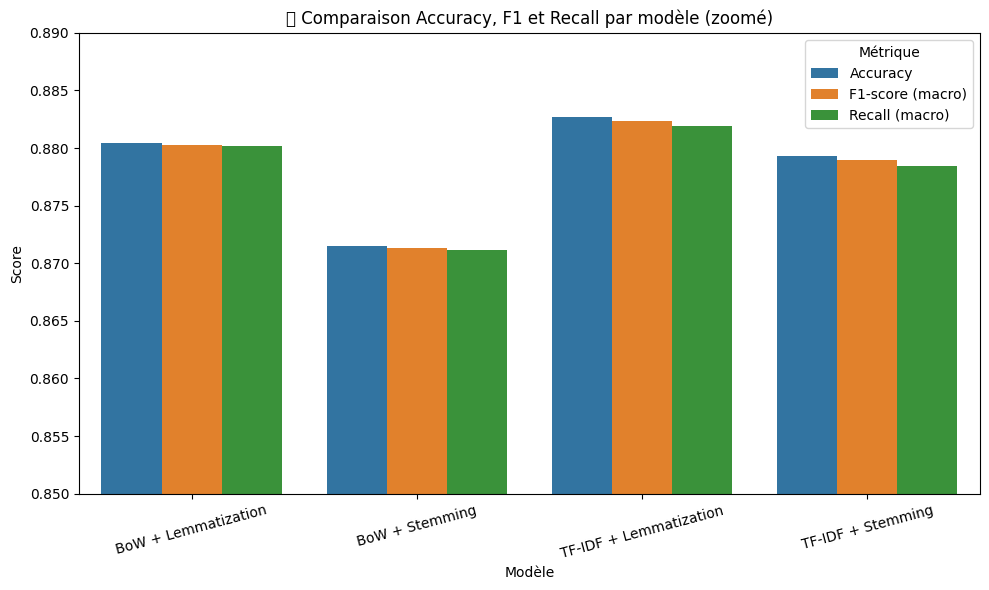

In [23]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Génère les rapports après avoir défini tes prédictions
rep_lemma_bow = classification_report(y_test, preds, output_dict=True)
rep_stem_bow = classification_report(y_test_stemming, preds_stemming, output_dict=True)
rep_lemma_tfidf = classification_report(y_test_tfidf, preds_tfidf, output_dict=True)
rep_stem_tfidf = classification_report(y_test_tfidf_stemming, preds_tfidf_stemming, output_dict=True)

# Dictionnaire des modèles et de leurs rapports
model_reports = {
    "BoW + Lemmatization": rep_lemma_bow,
    "BoW + Stemming": rep_stem_bow,
    "TF-IDF + Lemmatization": rep_lemma_tfidf,
    "TF-IDF + Stemming": rep_stem_tfidf,
}

# Extraire les métriques globales
metrics_data = []
for model, report in model_reports.items():
    metrics_data.append({
        "Modèle": model,
        "Accuracy": report["accuracy"],
        "F1-score (macro)": report["macro avg"]["f1-score"],
        "Recall (macro)": report["macro avg"]["recall"],
    })

# Mise en DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Transformation pour affichage groupé
metrics_melted = metrics_df.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Affichage avec zoom
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Modèle", y="Score", hue="Métrique")
plt.title("📊 Comparaison Accuracy, F1 et Recall par modèle (zoomé)")
plt.ylim(0.85, 0.89)  # Zoom sur la plage de scores proches
plt.xticks(rotation=15)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()

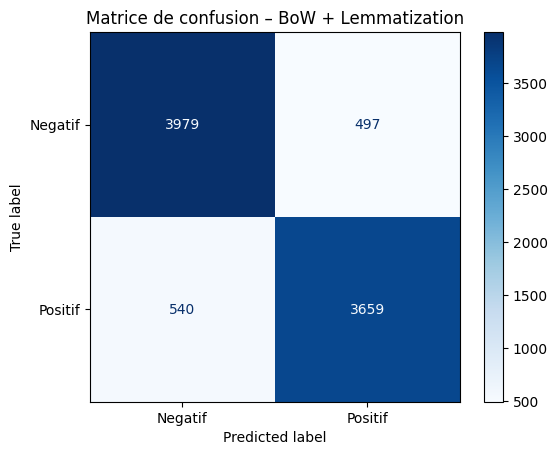

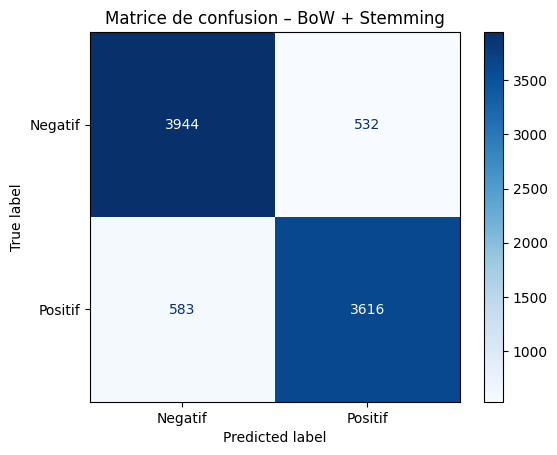

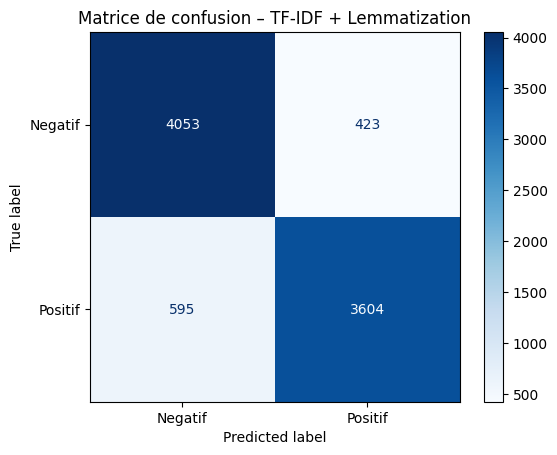

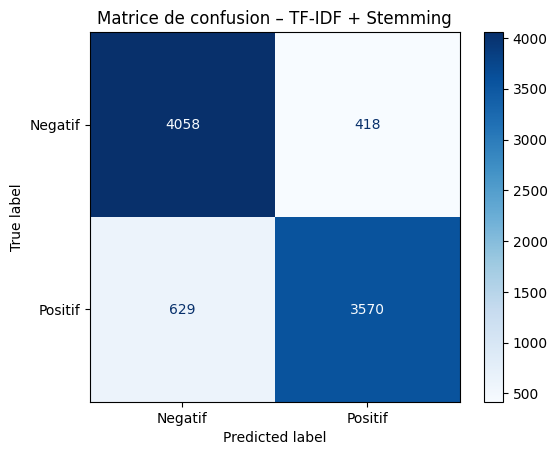

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Matrice de confusion – BoW + Lemmatization
cm1 = confusion_matrix(y_test, preds, labels=[0, 1])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=["Negatif", "Positif"])
disp1.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Lemmatization")
plt.grid(False)
plt.show()

# 2️⃣ Matrice de confusion – BoW + Stemming
cm2 = confusion_matrix(y_test_stemming, preds_stemming, labels=[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Negatif", "Positif"])
disp2.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Stemming")
plt.grid(False)
plt.show()

# 3️⃣ Matrice de confusion – TF-IDF + Lemmatization
cm3 = confusion_matrix(y_test_tfidf, preds_tfidf, labels=[0, 1])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=["Negatif", "Positif"])
disp3.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Lemmatization")
plt.grid(False)
plt.show()

# 4️⃣ Matrice de confusion – TF-IDF + Stemming
cm4 = confusion_matrix(y_test_tfidf_stemming, preds_tfidf_stemming, labels=[0, 1])
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=["Negatif", "Positif"])
disp4.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Stemming")
plt.grid(False)
plt.show()


### Twitt_without_pnctuation

In [25]:
#we will create a bag of words model after lemmatization
cv = CountVectorizer()
X1 = cv.fit_transform(twitt_data['Twitt_without_pnctuation_lemmatize'])
y1 = twitt_data['target']

#we will create a bag of words model after stemming
cv_stemming = CountVectorizer()
X_stemming1 = cv_stemming.fit_transform(twitt_data['Twitt_without_pnctuation_lemmatize_stemming'])
y_stemming1 = twitt_data['target']

#we will also create a tfidf model after lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf1 = tfidf.fit_transform(twitt_data['Twitt_without_pnctuation_lemmatize'])
y_tfidf1 = twitt_data['target']

# we will also create a tfidf model after stemming
tfidf_stemming = TfidfVectorizer()
X_tfidf_stemming1 = tfidf_stemming.fit_transform(twitt_data['Twitt_without_pnctuation_lemmatize_stemming'])
y_tfidf_stemming1 = twitt_data['target']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=101) #lemmatization
X_train_stemming1, X_test_stemming1, y_train_stemming1, y_test_stemming1 = train_test_split(X_stemming1, y_stemming1, test_size=0.2, random_state=101) #stemming

X_train_tfidf1, X_test_tfidf1, y_train_tfidf1, y_test_tfidf1 = train_test_split(X_tfidf1, y_tfidf1, test_size=0.2, random_state=101) #tfidf lemmatization
X_train_tfidf_stemming1, X_test_tfidf_stemming1, y_train_tfidf_stemming1, y_test_tfidf_stemming1 = train_test_split(X_tfidf_stemming1, y_tfidf_stemming1, test_size=0.2, random_state=101) #tfidf stemming

#we will use a multinomial naive bayes model with lemmatization and bag of words
nb = MultinomialNB()
nb.fit(X_train1, y_train1)
preds1 = nb.predict(X_test1)

#we will use a multinomial naive bayes model with stemming and bag of words
nb_stemming = MultinomialNB()
nb_stemming.fit(X_train_stemming1, y_train_stemming1)
preds_stemming1 = nb_stemming.predict(X_test_stemming1)


#we will use a multinomial naive bayes model with bag of words and tfidf
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf1, y_train_tfidf1)
preds_tfidf1 = nb_tfidf.predict(X_test_tfidf1)

#we will use a multinomial naive bayes model with stemming and tfidf
nb_tfidf_stemming = MultinomialNB()
nb_tfidf_stemming.fit(X_train_tfidf_stemming1, y_train_tfidf_stemming1)
preds_tfidf_stemming1 = nb_tfidf_stemming.predict(X_test_tfidf_stemming1)


# 📊 Rapports de performance pour chaque modèle
rep_lemma_bow = classification_report(y_test1, preds1, output_dict=False)
print("📄 Rapport - Bag-of-Words + Lemmatization\n", rep_lemma_bow)

rep_stem_bow = classification_report(y_test_stemming1, preds_stemming1, output_dict=False)
print("📄 Rapport - Bag-of-Words + Stemming\n", rep_stem_bow)

rep_lemma_tfidf = classification_report(y_test_tfidf1, preds_tfidf1, output_dict=False)
print("📄 Rapport - TF-IDF + Lemmatization\n", rep_lemma_tfidf)

rep_stem_tfidf = classification_report(y_test_tfidf_stemming1, preds_tfidf_stemming1, output_dict=False)
print("📄 Rapport - TF-IDF + Stemming\n", rep_stem_tfidf)

# ✅ Cette comparaison nous aide à identifier la meilleure combinaison de traitement + vectorisation pour une classification optimale.


📄 Rapport - Bag-of-Words + Lemmatization
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4476
           1       0.88      0.87      0.87      4199

    accuracy                           0.88      8675
   macro avg       0.88      0.88      0.88      8675
weighted avg       0.88      0.88      0.88      8675

📄 Rapport - Bag-of-Words + Stemming
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4476
           1       0.86      0.86      0.86      4199

    accuracy                           0.86      8675
   macro avg       0.86      0.86      0.86      8675
weighted avg       0.86      0.86      0.86      8675

📄 Rapport - TF-IDF + Lemmatization
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4476
           1       0.89      0.85      0.87      4199

    accuracy                           0.88      8675
   macro avg 

C:\Users\amzil\AppData\Local\Temp\ipykernel_24128\1876115046.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\amzil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


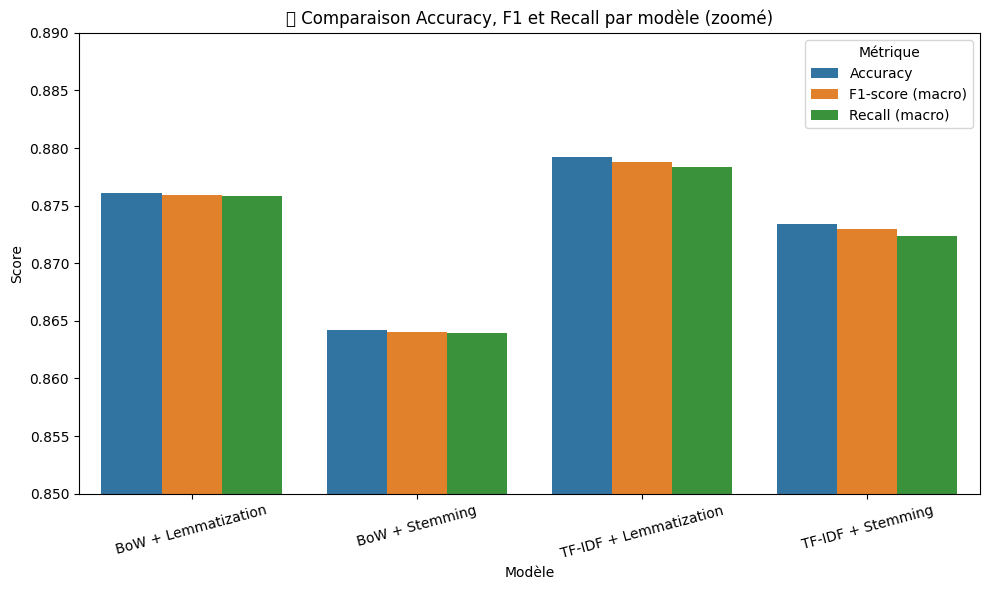

In [26]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Génère les rapports après avoir défini tes prédictions
rep_lemma_bow = classification_report(y_test1, preds1, output_dict=True)
rep_stem_bow = classification_report(y_test_stemming1, preds_stemming1, output_dict=True)
rep_lemma_tfidf = classification_report(y_test_tfidf1, preds_tfidf1, output_dict=True)
rep_stem_tfidf = classification_report(y_test_tfidf_stemming1, preds_tfidf_stemming1, output_dict=True)

# Dictionnaire des modèles et de leurs rapports
model_reports = {
    "BoW + Lemmatization": rep_lemma_bow,
    "BoW + Stemming": rep_stem_bow,
    "TF-IDF + Lemmatization": rep_lemma_tfidf,
    "TF-IDF + Stemming": rep_stem_tfidf,
}

# Extraire les métriques globales
metrics_data = []
for model, report in model_reports.items():
    metrics_data.append({
        "Modèle": model,
        "Accuracy": report["accuracy"],
        "F1-score (macro)": report["macro avg"]["f1-score"],
        "Recall (macro)": report["macro avg"]["recall"],
    })

# Mise en DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Transformation pour affichage groupé
metrics_melted = metrics_df.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Affichage avec zoom
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Modèle", y="Score", hue="Métrique")
plt.title("📊 Comparaison Accuracy, F1 et Recall par modèle (zoomé)")
plt.ylim(0.85, 0.89)  # Zoom sur la plage de scores proches
plt.xticks(rotation=15)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()

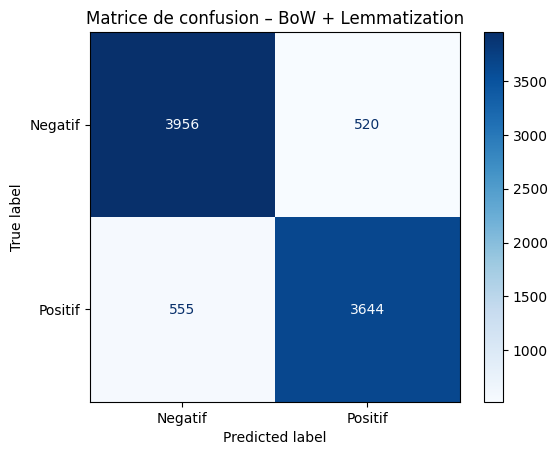

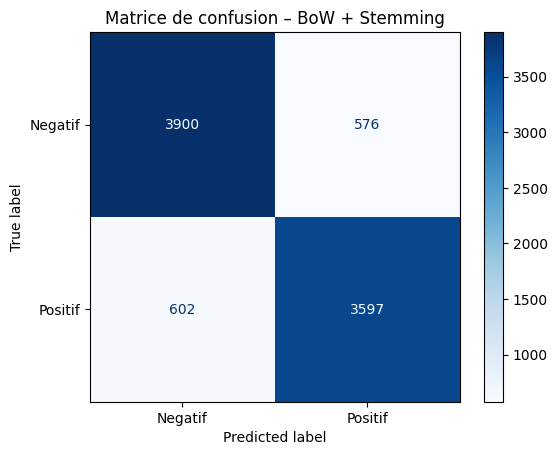

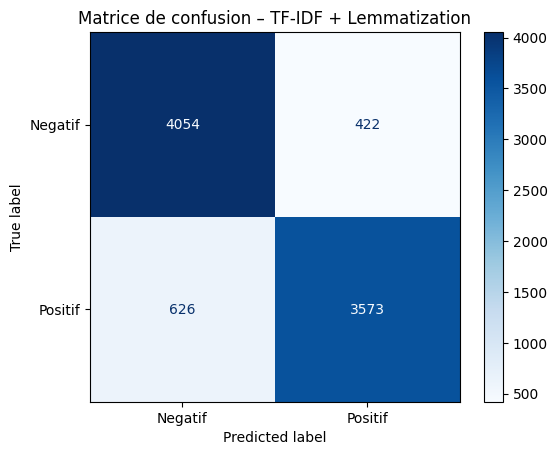

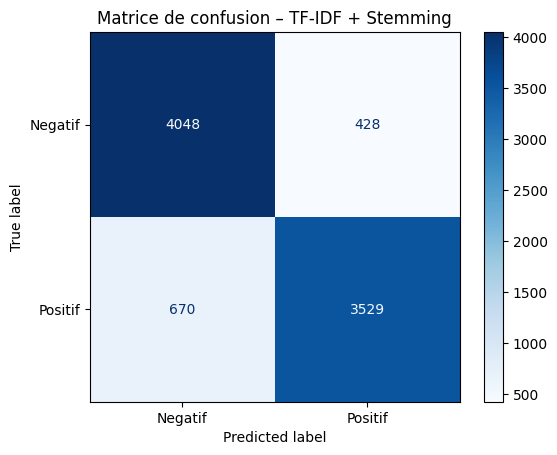

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Matrice de confusion – BoW + Lemmatization
cm1 = confusion_matrix(y_test1, preds1, labels=[0, 1])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Negatif", "Positif"])
disp1.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Lemmatization")
plt.grid(False)
plt.show()

# 2️⃣ Matrice de confusion – BoW + Stemming
cm2 = confusion_matrix(y_test_stemming1, preds_stemming1, labels=[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Negatif", "Positif"])
disp2.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Stemming")
plt.grid(False)
plt.show()

# 3️⃣ Matrice de confusion – TF-IDF + Lemmatization
cm3 = confusion_matrix(y_test_tfidf1, preds_tfidf1, labels=[0, 1])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=["Negatif", "Positif"])
disp3.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Lemmatization")
plt.grid(False)
plt.show()

# 4️⃣ Matrice de confusion – TF-IDF + Stemming
cm4 = confusion_matrix(y_test_tfidf_stemming1, preds_tfidf_stemming1, labels=[0, 1])
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=["Negatif", "Positif"])
disp4.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Stemming")
plt.grid(False)
plt.show()


### Twitt_without_pnctuation_and_lowe

In [28]:
#we will create a bag of words model after lemmatization
cv = CountVectorizer()
X2 = cv.fit_transform(twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'])
y2 = twitt_data['target']

#we will create a bag of words model after stemming
cv_stemming = CountVectorizer()
X_stemming2 = cv_stemming.fit_transform(twitt_data['Twitt_without_pnctuation_and_lower_lemmatize_stemming'])
y_stemming2 = twitt_data['target']

#we will also create a tfidf model after lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf2 = tfidf.fit_transform(twitt_data['Twitt_without_pnctuation_and_lower_lemmatize'])
y_tfidf2 = twitt_data['target']

# we will also create a tfidf model after stemming
tfidf_stemming = TfidfVectorizer()
X_tfidf_stemming2 = tfidf_stemming.fit_transform(twitt_data['Twitt_without_pnctuation_and_lower_lemmatize_stemming'])
y_tfidf_stemming2 = twitt_data['target']



X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=101) #lemmatization
X_train_stemming2, X_test_stemming2, y_train_stemming2, y_test_stemming2 = train_test_split(X_stemming2, y_stemming2, test_size=0.2, random_state=101) #stemming

X_train_tfidf2, X_test_tfidf2, y_train_tfidf2, y_test_tfidf2 = train_test_split(X_tfidf2, y_tfidf2, test_size=0.2, random_state=101) #tfidf lemmatization
X_train_tfidf_stemming2, X_test_tfidf_stemming2, y_train_tfidf_stemming2, y_test_tfidf_stemming2 = train_test_split(X_tfidf_stemming2, y_tfidf_stemming2, test_size=0.2, random_state=101) #tfidf stemming

#we will use a multinomial naive bayes model with lemmatization and bag of words
nb = MultinomialNB()
nb.fit(X_train2, y_train2)
preds2 = nb.predict(X_test2)

#we will use a multinomial naive bayes model with stemming and bag of words
nb_stemming = MultinomialNB()
nb_stemming.fit(X_train_stemming2, y_train_stemming2)
preds_stemming2 = nb_stemming.predict(X_test_stemming2)


#we will use a multinomial naive bayes model with bag of words and tfidf
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf2, y_train_tfidf2)
preds_tfidf2 = nb_tfidf.predict(X_test_tfidf2)

#we will use a multinomial naive bayes model with stemming and tfidf
nb_tfidf_stemming = MultinomialNB()
nb_tfidf_stemming.fit(X_train_tfidf_stemming2, y_train_tfidf_stemming2)
preds_tfidf_stemming2 = nb_tfidf_stemming.predict(X_test_tfidf_stemming2)
# 📊 Rapports de performance pour chaque modèle
rep_lemma_bow = classification_report(y_test1, preds1, output_dict=False)
print("📄 Rapport - Bag-of-Words + Lemmatization\n", rep_lemma_bow)

rep_stem_bow = classification_report(y_test_stemming1, preds_stemming1, output_dict=False)
print("📄 Rapport - Bag-of-Words + Stemming\n", rep_stem_bow)

rep_lemma_tfidf = classification_report(y_test_tfidf1, preds_tfidf1, output_dict=False)
print("📄 Rapport - TF-IDF + Lemmatization\n", rep_lemma_tfidf)

rep_stem_tfidf = classification_report(y_test_tfidf_stemming1, preds_tfidf_stemming1, output_dict=False)
print("📄 Rapport - TF-IDF + Stemming\n", rep_stem_tfidf)

# ✅ Cette comparaison nous aide à identifier la meilleure combinaison de traitement + vectorisation pour une classification optimale.


📄 Rapport - Bag-of-Words + Lemmatization
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4476
           1       0.88      0.87      0.87      4199

    accuracy                           0.88      8675
   macro avg       0.88      0.88      0.88      8675
weighted avg       0.88      0.88      0.88      8675

📄 Rapport - Bag-of-Words + Stemming
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4476
           1       0.86      0.86      0.86      4199

    accuracy                           0.86      8675
   macro avg       0.86      0.86      0.86      8675
weighted avg       0.86      0.86      0.86      8675

📄 Rapport - TF-IDF + Lemmatization
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4476
           1       0.89      0.85      0.87      4199

    accuracy                           0.88      8675
   macro avg 

C:\Users\amzil\AppData\Local\Temp\ipykernel_24128\1205014911.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\amzil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


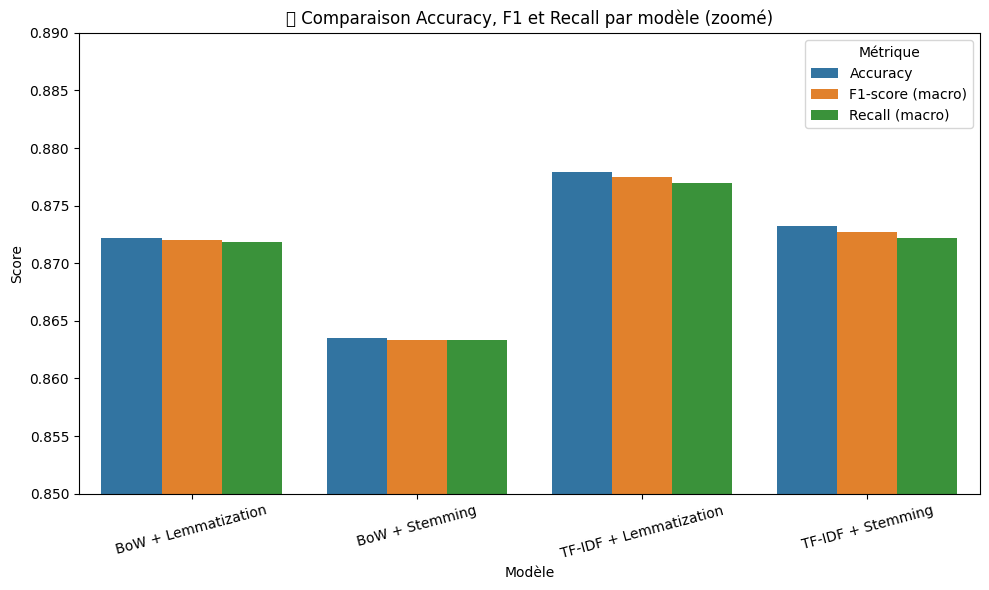

In [29]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Génère les rapports après avoir défini tes prédictions
rep_lemma_bow = classification_report(y_test2, preds2, output_dict=True)
rep_stem_bow = classification_report(y_test_stemming2, preds_stemming2, output_dict=True)
rep_lemma_tfidf = classification_report(y_test_tfidf2, preds_tfidf2, output_dict=True)
rep_stem_tfidf = classification_report(y_test_tfidf_stemming2, preds_tfidf_stemming2, output_dict=True)

# Dictionnaire des modèles et de leurs rapports
model_reports = {
    "BoW + Lemmatization": rep_lemma_bow,
    "BoW + Stemming": rep_stem_bow,
    "TF-IDF + Lemmatization": rep_lemma_tfidf,
    "TF-IDF + Stemming": rep_stem_tfidf,
}

# Extraire les métriques globales
metrics_data = []
for model, report in model_reports.items():
    metrics_data.append({
        "Modèle": model,
        "Accuracy": report["accuracy"],
        "F1-score (macro)": report["macro avg"]["f1-score"],
        "Recall (macro)": report["macro avg"]["recall"],
    })

# Mise en DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Transformation pour affichage groupé
metrics_melted = metrics_df.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Affichage avec zoom
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Modèle", y="Score", hue="Métrique")
plt.title("📊 Comparaison Accuracy, F1 et Recall par modèle (zoomé)")
plt.ylim(0.85, 0.89)  # Zoom sur la plage de scores proches
plt.xticks(rotation=15)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()

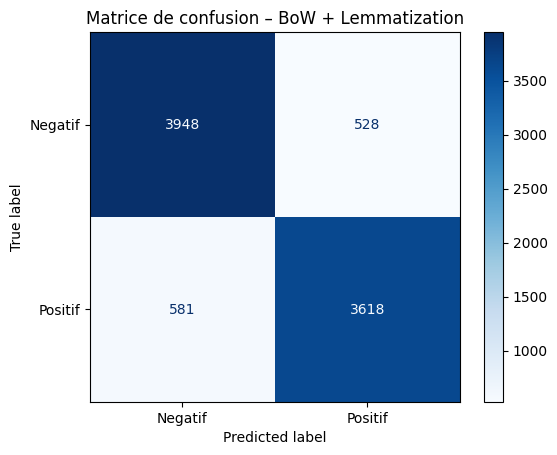

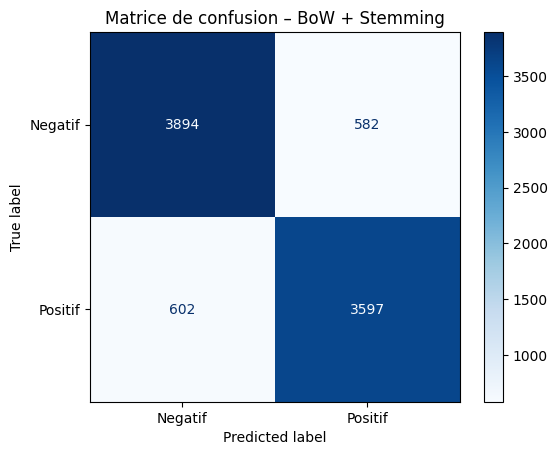

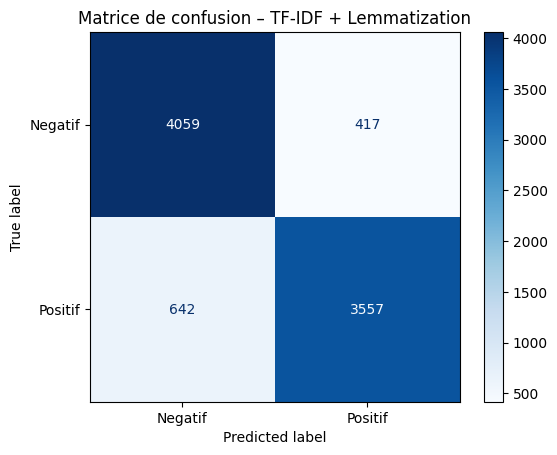

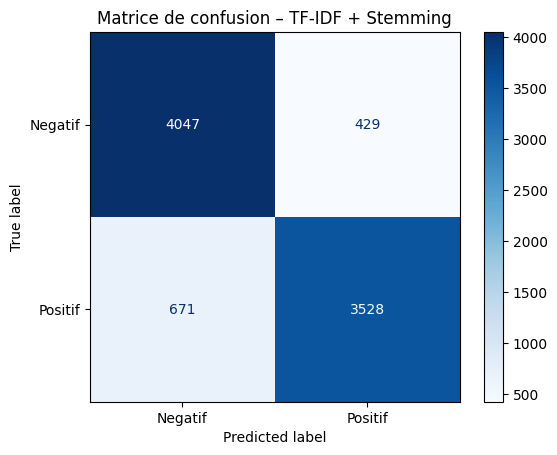

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Matrice de confusion – BoW + Lemmatization
cm1 = confusion_matrix(y_test2, preds2, labels=[0, 1])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Negatif", "Positif"])
disp1.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Lemmatization")
plt.grid(False)
plt.show()

# 2️⃣ Matrice de confusion – BoW + Stemming
cm2 = confusion_matrix(y_test_stemming2, preds_stemming2, labels=[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Negatif", "Positif"])
disp2.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Stemming")
plt.grid(False)
plt.show()

# 3️⃣ Matrice de confusion – TF-IDF + Lemmatization
cm3 = confusion_matrix(y_test_tfidf2, preds_tfidf2, labels=[0, 1])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=["Negatif", "Positif"])
disp3.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Lemmatization")
plt.grid(False)
plt.show()

# 4️⃣ Matrice de confusion – TF-IDF + Stemming
cm4 = confusion_matrix(y_test_tfidf_stemming2, preds_tfidf_stemming2, labels=[0, 1])
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=["Negatif", "Positif"])
disp4.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Stemming")
plt.grid(False)
plt.show()


#Visualisations

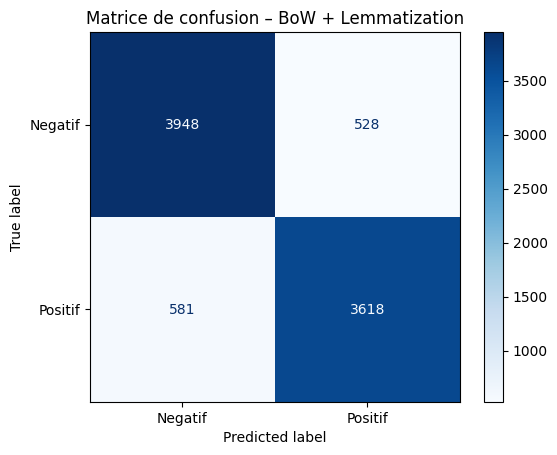

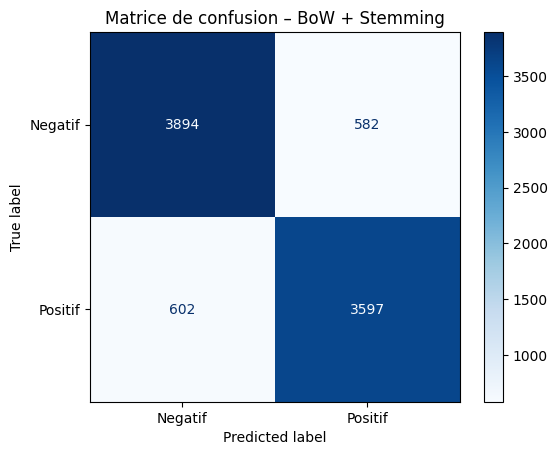

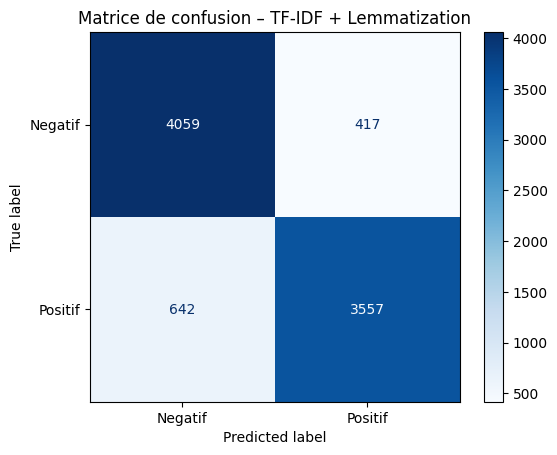

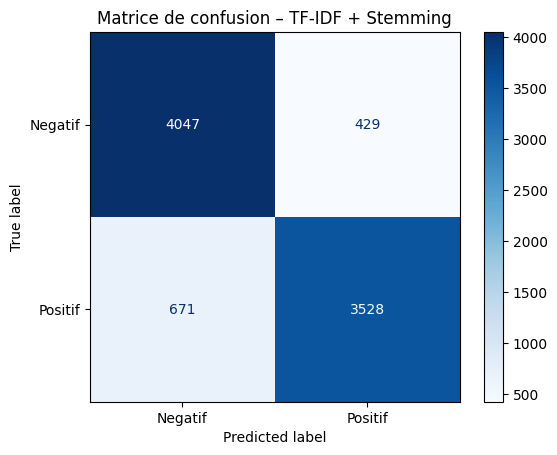

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Matrice de confusion – BoW + Lemmatization
cm1 = confusion_matrix(y_test2, preds2, labels=[0, 1])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Negatif", "Positif"])
disp1.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Lemmatization")
plt.grid(False)
plt.show()

# 2️⃣ Matrice de confusion – BoW + Stemming
cm2 = confusion_matrix(y_test_stemming2, preds_stemming2, labels=[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Negatif", "Positif"])
disp2.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – BoW + Stemming")
plt.grid(False)
plt.show()

# 3️⃣ Matrice de confusion – TF-IDF + Lemmatization
cm3 = confusion_matrix(y_test_tfidf2, preds_tfidf2, labels=[0, 1])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=["Negatif", "Positif"])
disp3.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Lemmatization")
plt.grid(False)
plt.show()

# 4️⃣ Matrice de confusion – TF-IDF + Stemming
cm4 = confusion_matrix(y_test_tfidf_stemming2, preds_tfidf_stemming2, labels=[0, 1])
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=["Negatif", "Positif"])
disp4.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – TF-IDF + Stemming")
plt.grid(False)
plt.show()


C:\Users\amzil\AppData\Local\Temp\ipykernel_24128\2861394205.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\amzil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


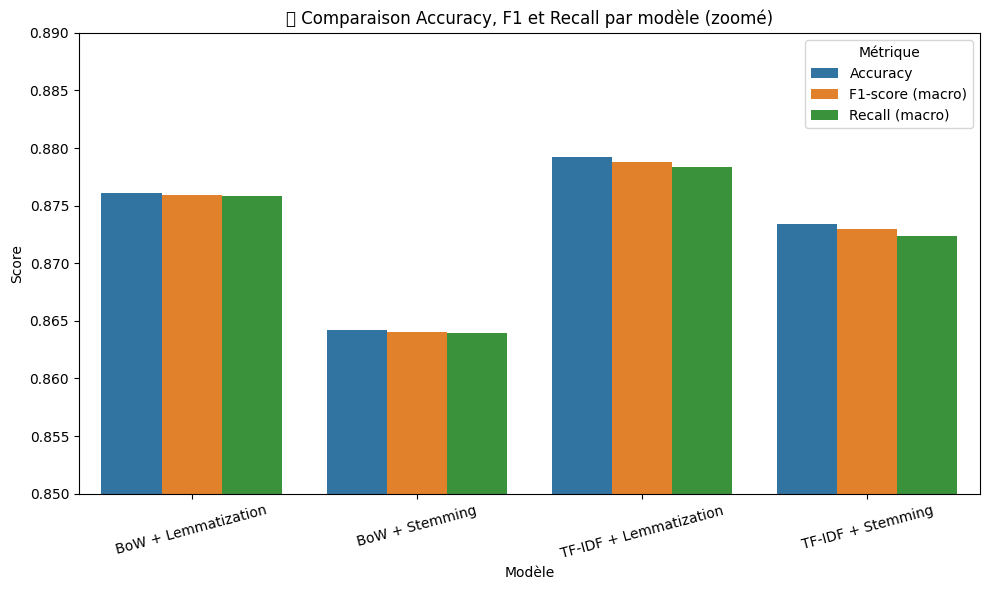

In [32]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Génère les rapports après avoir défini tes prédictions
rep_lemma_bow = classification_report(y_test1, preds1, output_dict=True)
rep_stem_bow = classification_report(y_test_stemming1, preds_stemming1, output_dict=True)
rep_lemma_tfidf = classification_report(y_test_tfidf1, preds_tfidf1, output_dict=True)
rep_stem_tfidf = classification_report(y_test_tfidf_stemming1, preds_tfidf_stemming1, output_dict=True)

# Dictionnaire des modèles et de leurs rapports
model_reports = {
    "BoW + Lemmatization": rep_lemma_bow,
    "BoW + Stemming": rep_stem_bow,
    "TF-IDF + Lemmatization": rep_lemma_tfidf,
    "TF-IDF + Stemming": rep_stem_tfidf,
}

# Extraire les métriques globales
metrics_data = []
for model, report in model_reports.items():
    metrics_data.append({
        "Modèle": model,
        "Accuracy": report["accuracy"],
        "F1-score (macro)": report["macro avg"]["f1-score"],
        "Recall (macro)": report["macro avg"]["recall"],
    })

# Mise en DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Transformation pour affichage groupé
metrics_melted = metrics_df.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Affichage avec zoom
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Modèle", y="Score", hue="Métrique")
plt.title("📊 Comparaison Accuracy, F1 et Recall par modèle (zoomé)")
plt.ylim(0.85, 0.89)  # Zoom sur la plage de scores proches
plt.xticks(rotation=15)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()


#4. Test

In [33]:
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()

def preprocess_lemma(text):
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Saisie utilisateur
b = input("Entrer un texte : ")
print("📝 Texte saisi :", b)

# Prétraitement
b_clean = preprocess_lemma(b)

# Mapping du résultat
label_map = {
    0: "❌ Négatif",
    1: "✅ Positif",
}

# Vectorisation avec le TfidfVectorizer déjà entraîné
X_user = tfidf.transform([b_clean])  # tfidf est celui utilisé pour X_tfidf2

# Prédiction
prediction = nb_tfidf.predict(X_user)
print("🧠 Sentiment prédit :", label_map.get(prediction[0], "Inconnu"))


📝 Texte saisi : i am happy
🧠 Sentiment prédit : ✅ Positif


In [34]:
import random

random_index = random.randint(0, len(twitt_data) - 1)
random_tweet = (
    twitt_data.iloc[random_index]["Twitt_without_pnctuation"] + " " +
    twitt_data.iloc[random_index]["Twitt_without_pnctuation_and_lower_lemmatize"]+" "+
    twitt_data.iloc[random_index]["Twitt_lemmatize_stemming"]
)

label_map = {
    0: "❌ Négatif",
    1: "✅ Positif",
    2: "➖ Neutre",
    3: "❓ Autre / Non classé"
}
true_label = twitt_data.iloc[random_index]["target"]

tweet_vectorized = tfidf.transform([random_tweet])

pred = nb_tfidf.predict(tweet_vectorized)[0]

print("🔎 Tweet :", random_tweet)
print("🧠 Sentiment prédit :", label_map.get(pred, "Inconnu"))
print("✔️ Sentiment réel :", label_map.get(true_label, "Inconnu"))

🔎 Tweet : FIFA 15 Soundtrack is the best sports game soundtrack of all time fifa 15 soundtrack best sport game soundtrack time fifa 15 soundtrack best sport game soundtrack time.
🧠 Sentiment prédit : ✅ Positif
✔️ Sentiment réel : ✅ Positif
